In [4]:
%matplotlib inline
import matplotlib
#matplotlib.use("AGG")
from mpl_toolkits.basemap import Basemap, shiftgrid
import numpy as np
from pylab import *
import numpy.ma as ma
from glob import glob
from scipy.io import netcdf
import numpy.ma as ma
import string
from scipy import stats
import matplotlib as mpl
import scipy.ndimage as ndimage
from netCDF4 import Dataset
#from Read import *
#from Plot import *

In [12]:
# Read grid and mask
# Temporal range
x = 129
y = 104
nyears = 7

filepath = './iceh.2013-12-01.nc'
# Read tarea, TLON and TLAT
data=Dataset(filepath,"r")
#data=netcdf.netcdf_file(filepath,'r')
TLON=data.variables['TLON'][:, :]
TLAT=data.variables['TLAT'][:, :]
tarea=data.variables['tarea'][:, :]

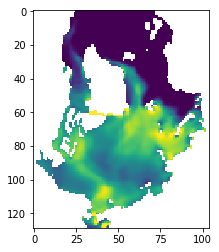

In [19]:
# Read model snow April
#Snow april

filepath2 = './snow_april.nc'
#filepath2 = '/Users/mct/Documents/WORK/PAPERS/PAPER_Julienne_David_growth2017/data_new/snow_april_anom.nc'
data2=Dataset(filepath2,"r")
CSanom=data2.variables['hs_m'][:,:]
imshow(squeeze(CSanom[0,:,:]), vmin=0.0, vmax=0.5)


/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3413: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3422: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


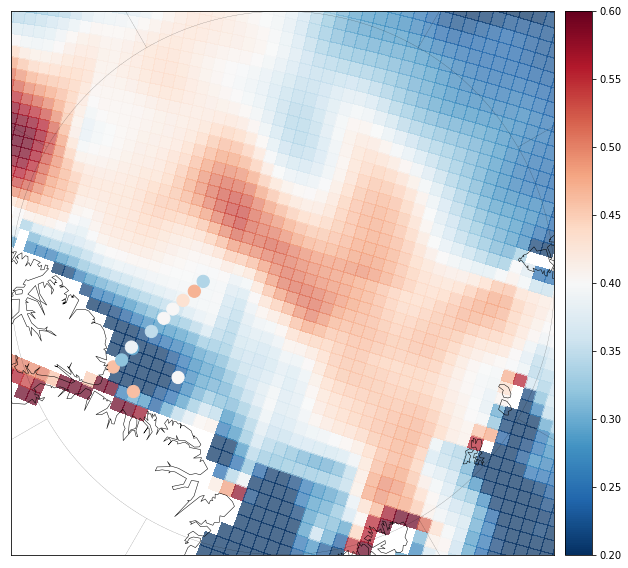

In [187]:
mplot = Basemap(projection='npaeqd',boundinglat=80,lon_0=360,resolution='l')
[lons,lats]=[TLON,TLAT]
x, y = mplot(lons, lats)
xt=np.transpose(x)
yt=np.transpose(y)
plt.clf()
plt.close()
plt.figure(figsize=(20,10))
mplot.drawparallels(np.arange(60,90,10), linewidth = 0.25, linestyle='solid', zorder=8)
mplot.drawmeridians(np.arange(0.,360.,30.), linewidth = 0.25, zorder=8)
mplot.drawcoastlines(linewidth=0.5)
mplot.pcolormesh(x, y, squeeze(CSanom[6,:,:]), cmap='RdBu_r', vmin=0.2, vmax=0.6, alpha=0.7)
#mplot.scatter(x_field, y_field, hs_field_mean, 'RdBu_r', vmin=0.2, vmax=0.6)
#mplot.plot(x_field, y_field, 'o', markersize=15,zorder=6, markerfacecolor='#424FA4',markeredgecolor="none", alpha=0.5)
mplot.scatter(np.asarray(x_field), np.asarray(y_field), s=150, c=np.asarray(hs_field_mean), cmap='RdBu_r', vmin=0.2, vmax=0.6)
mplot.colorbar()
savefig('model_vs_field_April2017.jpg', dpi=150)

In [140]:
lat_field=[83.0489, 83.4422, 83.9827, 83.9602, 84.8561, 85.4468, 85.854, 86.2836, 86.7422, 87.0815, 83.215, 84.8187]
lon_field=[-63.616+360., -64.415+360., -66.3581+360., -67.0132+360., -69.7093+360., -73.4275+360., -76.641+360., -80.0811+360., -84.6459+360., -91.1573+360., -53.9498+360., -47.8761+360.]
hs_field_mean=[0.46, 0.32, 0.3, 0.39, 0.35, 0.4, 0.4, 0.43, 0.47, 0.34, 0.46, 0.4]
hs_field_sdv=[0.24, 0.15, 0.25, 0.28, 0.2, 0.25, 0.23, 0.14, 0.24, 0.22, 0.33, 0.16]
hs_field_mode=[0.24, 0.15, 0.25, 0.28, 0.2, 0.25, 0.23, 0.14, 0.24, 0.22, 0.33, 0.16]

In [141]:
[x_field,y_field] = mplot(lon_field, lat_field)
x_fieldt=np.transpose(x_field)
y_fieldt=np.transpose(y_field)

In [142]:
#https://stackoverflow.com/questions/10818546/finding-index-of-nearest-point-in-numpy-arrays-of-x-and-y-coordinates
from scipy import spatial
TLON_ravel=np.ravel(TLON)
TLAT_ravel=np.ravel(TLAT)
A=np.transpose(np.vstack((TLON_ravel,TLAT_ravel)))
pts=np.transpose(np.vstack((lon_field,lat_field)))
A[spatial.KDTree(A).query(pts)[1]]
distance,index = spatial.KDTree(A).query(pts)

In [126]:
A[spatial.KDTree(A).query(pts)[1]]


array([[296.77652 ,  83.00974 ],
       [296.82434 ,  83.63347 ],
       [293.90454 ,  83.954094],
       [293.61536 ,  84.57064 ],
       [290.0163  ,  84.86087 ],
       [286.04913 ,  85.123085],
       [282.69226 ,  86.30571 ],
       [279.58612 ,  85.93268 ],
       [276.36383 ,  87.45538 ],
       [268.33737 ,  86.24335 ],
       [305.58948 ,  83.811874],
       [312.2394  ,  85.27546 ]], dtype=float32)

In [127]:
np.transpose(A)

array([[283.40063 , 283.89502 , 284.88467 , ..., 115.9748  , 115.03923 ,
        114.10958 ],
       [ 46.40304 ,  46.42919 ,  46.47966 , ...,  56.008083,  55.77591 ,
         55.54226 ]], dtype=float32)

/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/ipykernel_launcher.py:9: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  if __name__ == '__main__':
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


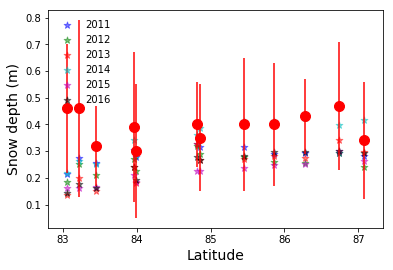

In [263]:
from itertools import cycle
cycol = cycle('bgrcmk')
    
hs_2017_ravel=np.ravel(CSanom[6,:,:])
#hs_2017_ravel[index[0:12]]
plt.errorbar(lat_field,hs_field_mean,hs_field_sdv, fmt='o', markersize='10', color='r')
for i in range(6):
    hs_2017_ravel=np.ravel(CSanom[i,:,:])
    plt.hold('true')
    plt.scatter(lat_field,hs_2017_ravel[index[0:12]],c=next(cycol), marker="*", s=50, label='201'+str(i+1),alpha=0.5)
    plt.legend(framealpha=0.0, mode="expand")
    plt.legend()
plt.legend(frameon=False)
plt.ylabel('Snow depth (m)', fontsize=14)
plt.xlabel('Latitude', fontsize=14)

savefig('scatter2011to2016.jpg',dpi=300)

/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/ipykernel_launcher.py:8: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


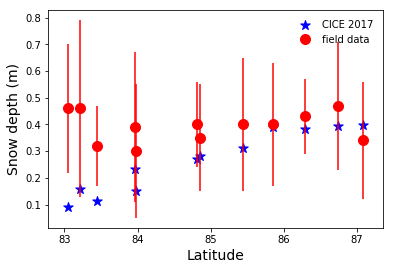

In [262]:
from itertools import cycle
cycol = cycle('bgrcmk')
    
hs_2017_ravel=np.ravel(CSanom[6,:,:])
#hs_2017_ravel[index[0:12]]
plt.errorbar(lat_field,hs_field_mean,hs_field_sdv, fmt='o', markersize='10', color='r', label='field data')
hs_2017_ravel=np.ravel(CSanom[6,:,:])
plt.hold('true')
plt.scatter(lat_field,hs_2017_ravel[index[0:12]],c=next(cycol), marker="*", s=100, label='CICE 201'+str(7))
plt.legend(framealpha=0.0, mode="expand")
plt.legend()
plt.legend(frameon=False)
plt.ylabel('Snow depth (m)', fontsize=14)
plt.xlabel('Latitude', fontsize=14)
savefig('scatter2017.jpg',dpi=300)

In [190]:
hs_field_mean

[0.46, 0.32, 0.3, 0.39, 0.35, 0.4, 0.4, 0.43, 0.47, 0.34, 0.46, 0.4]

/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: pyplot.hold is deprecated.
    Future behavior will be consistent with the long-time default:
    plot commands add elements without first clearing the
    Axes and/or Figure.
  after removing the cwd from sys.path.
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/matplotlib/__init__.py:805: MatplotlibDeprecationWarning: axes.hold is deprecated. Please remove it from your matplotlibrc and/or style files.
  mplDeprecation)
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/matplotlib/rcsetup.py:155: MatplotlibDeprecationWarning: axes.hold is deprecated, will be removed in 3.0
  mplDeprecation)


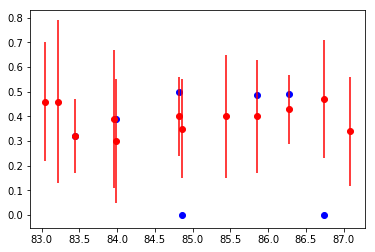

In [204]:
hs_2017_ravel=np.ravel(np.transpose(CSanom[6,:,:]))
hs_2017_ravel[index[0:12]]
plt.errorbar(lat_field,hs_field_mean,hs_field_sdv, fmt='o',color='r')
plt.hold('true')
plt.scatter(lat_field,hs_2017_ravel[index[0:12]],color='b')

/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3222: MatplotlibDeprecationWarning: The ishold function was deprecated in version 2.0.
  b = ax.ishold()
/Users/micheltsamados/miniconda3/envs/mypython3/lib/python3.5/site-packages/mpl_toolkits/basemap/__init__.py:3231: MatplotlibDeprecationWarning: axes.hold is deprecated.
    See the API Changes document (http://matplotlib.org/api/api_changes.html)
    for more details.
  ax.hold(b)


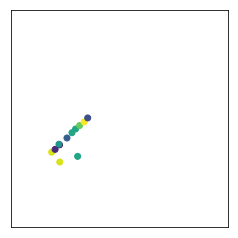

In [167]:
mplot.scatter(np.asarray(x_field), np.asarray(y_field), c=np.asarray(hs_field_mean))


In [162]:
hs_field_mean.shape

AttributeError: 'list' object has no attribute 'shape'

In [166]:
np.asarray(hs_field_mean).shape

(12,)

In [239]:
str(i)

'6'